In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
britannia = pd.read_csv('STOCK_VAL.csv')

stockdf = pd.DataFrame(britannia)

In [1]:
stockdf['DATE'] = pd.to_datetime(stockdf['DATE'], dayfirst=True )

NameError: name 'pd' is not defined

In [4]:
stockdf.head()

,DATE,OPEN,HIGH,LOW,CLOSE,NO. OF SHARES,NO. OF TRADES,Market Capitalization
0,2023-02-09,4626.90,4658.00,4585.00,4637.60,1722,607,7.958223e+06
1,2023-02-08,4597.05,4637.05,4578.00,4590.95,3670,906,1.690962e+07
2,2023-02-07,4630.00,4661.50,4595.95,4605.35,5979,1589,2.767515e+07
3,2023-02-06,4602.00,4634.10,4602.00,4626.60,4502,1230,2.079046e+07
4,2023-02-03,4590.00,4656.45,4571.50,4624.80,26221,4118,1.209830e+08


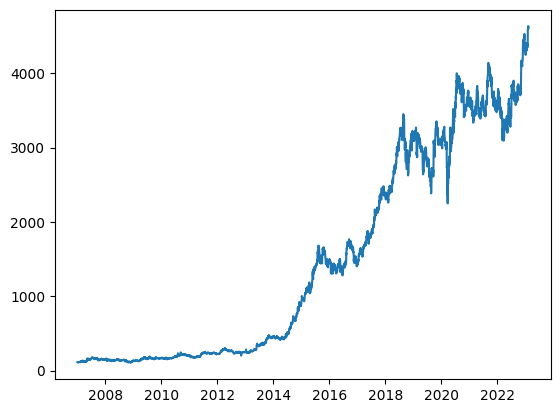

In [5]:
plt.plot(stockdf['DATE'], stockdf['OPEN'])



From here we can see that the plot is almost linear with some fluctuations from 2015

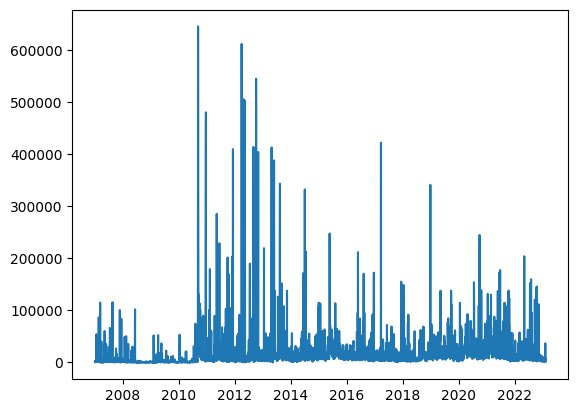

In [6]:
plt.plot(stockdf['DATE'], stockdf['NO. OF SHARES'])


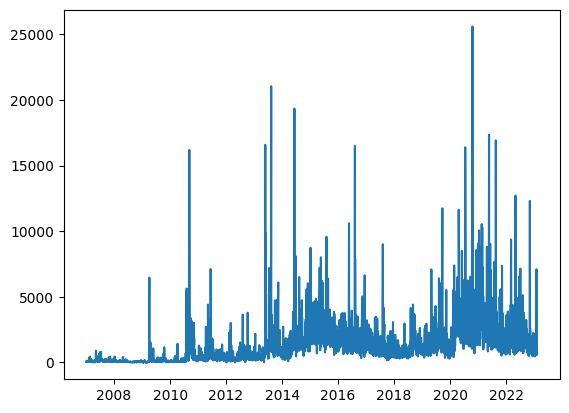

In [7]:
plt.plot(stockdf['DATE'], stockdf['NO. OF TRADES'])


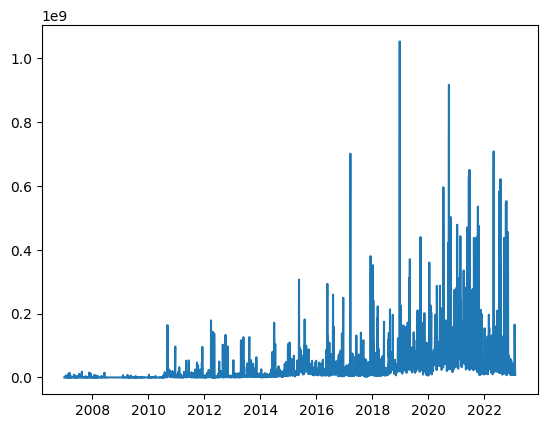

In [8]:
plt.plot(stockdf['DATE'], stockdf['Market Capitalization'])

In [9]:
# filtstockdf = stockdf[stockdf["DATE"] > "2014-10-01"]
filtstockdf = stockdf

filtstockdf.tail()

,DATE,OPEN,HIGH,LOW,CLOSE,NO. OF SHARES,NO. OF TRADES,Market Capitalization
3980,2007-01-08,109.50,113.8,109.06,110.04,1394,60,155333.42
3981,2007-01-05,110.68,112.0,110.00,110.10,1013,72,112443.00
3982,2007-01-04,110.00,111.8,109.00,110.13,2999,99,331089.60
3983,2007-01-03,110.20,111.4,109.20,109.51,1139,70,125631.70
3984,2007-01-02,112.00,112.0,109.50,109.72,1010,59,111857.50


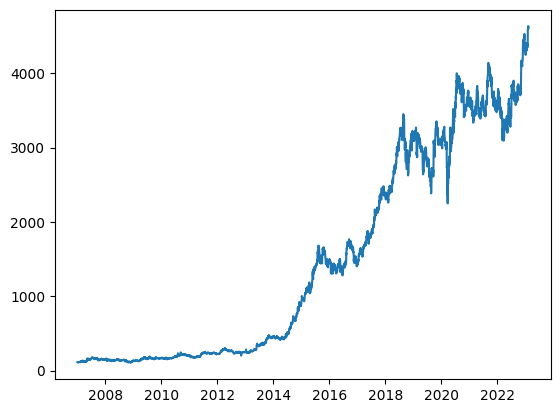

In [10]:
plt.plot(filtstockdf['DATE'], filtstockdf['OPEN'])


## Train-Test Splitting

In [11]:
filtstockdf["DAY"] = filtstockdf["DATE"].dt.day
filtstockdf["MONTH"] = filtstockdf["DATE"].dt.month
filtstockdf["YEAR"] = filtstockdf["DATE"].dt.year

features = ['DATE', 'DAY', 'MONTH', 'YEAR']

X = filtstockdf[features]

y = filtstockdf['OPEN']

In [215]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)


In [216]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# model = DecisionTreeRegressor(max_leaf_nodes=500, random_state=0)
model = RandomForestRegressor(n_estimators=100, min_samples_split=2,max_leaf_nodes=2000 , random_state=0)
# model = GradientBoostingRegressor()

feat = ['DAY', 'MONTH', 'YEAR']
xxf = X_train[feat]

model.fit(xxf, y_train)

RandomForestRegressor(max_leaf_nodes=2000, random_state=0)

In [217]:
y_pred = model.predict(X_val[feat])
y_pred

array([3293.168     , 1286.244     , 4439.591     , 3693.574     ,
       3659.491     ,  167.7468    ,  219.113     , 2344.9838    ,
       1669.35213333, 3450.478     , 3082.6045    , 1476.0613    ,
        153.5634    , 3553.1795    ,  202.8165    ,  236.8748    ,
       3095.3455    , 1662.7207    ,  283.9623    , 1702.7173    ,
       3566.3495    ,  222.959     , 3587.54      , 3059.699     ,
        166.3405    , 1092.641     ,  251.684     , 1442.6702    ,
       2742.303     , 1708.7342    , 3215.6805    , 2953.1786    ,
        267.9733    , 1365.7941    , 2641.72      ,  119.3476    ,
        218.3728    , 2887.841     , 3769.471     , 2672.3095    ,
       1032.412     , 2907.497     ,  209.704     , 3560.3515    ,
        190.0561    ,  218.4206    ,  163.9065    , 3676.334     ,
        236.2832    , 3984.41      ,  224.6472    ,  242.0692    ,
       1998.412     , 3775.434     , 3021.2381    ,  259.158     ,
       2660.003     ,  246.5219    , 3773.03      ,  773.375  

In [218]:
from sklearn.metrics import mean_absolute_error

error = mean_absolute_error(y_val, y_pred)
print(error)

21.215602881639576


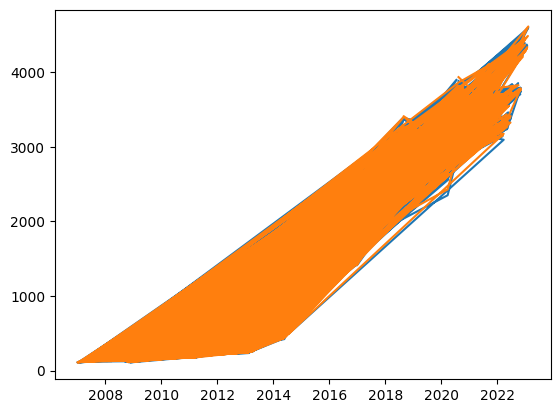

In [219]:
plt.plot(X_val.DATE, y_val)
plt.plot(X_val.DATE, y_pred)

In [220]:
y_pred2 = model.predict(X[feat])



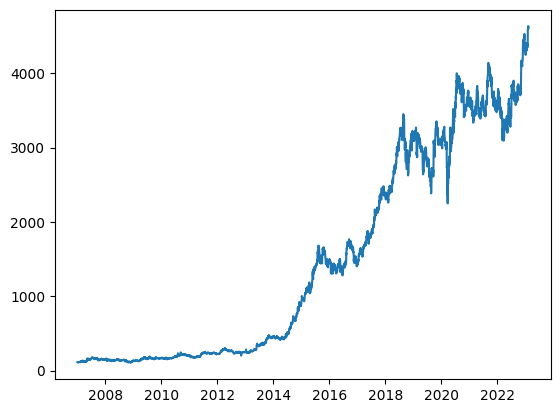

In [221]:
plt.plot(X.DATE, y)


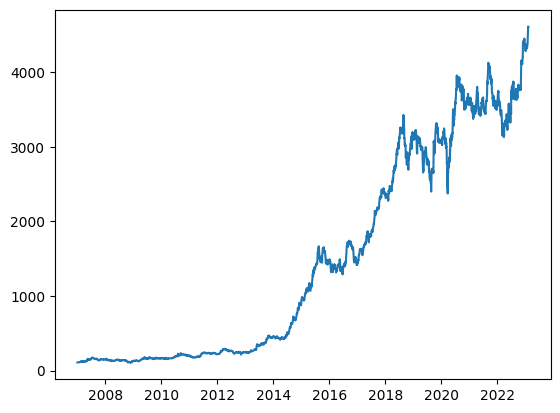

In [222]:
plt.plot(X.DATE, y_pred2)

In [223]:
# from sklearn.metrics import mean_absolute_error

error2 = mean_absolute_error(y, y_pred2)
error2

9.681969259066765

After checking with all the models,  I found that the random forest regressor is giving least error

### Continuing with Random Forest Regression Model

In [224]:
   marchpredictdates = ['2023-02-10',
                        '2023-02-11',
                        '2023-02-12',
                        '2023-02-13',
                        '2023-02-14',
                        '2023-02-15',
                        '2023-02-16',
                        '2023-02-17',
                        '2023-02-18',
                        '2023-02-19',
                        '2023-02-20',
                        '2023-02-21',
                        '2023-02-22',
                        '2023-02-23',
                        '2023-02-24',
                        '2023-02-25',
                        '2023-02-26',
                        '2023-02-27',
                        '2023-02-28',
                        '2023-03-01',
                        '2023-03-02',
                        '2023-03-03',
                        '2023-03-04',
                        '2023-03-05',
                        '2023-03-06',
                        '2023-03-08',
                        '2023-03-09',
                        '2023-03-10',
                        '2023-03-11',
                        '2023-03-12',
                        '2023-03-13',
                        '2023-03-14',
                        '2023-03-15',
                        '2023-03-16',
                        '2023-03-17',
                        '2023-03-18',
                        '2023-03-19']

In [231]:
marchdatapoints = np.array(marchpredictdates)
marchdatapoints = pd.to_datetime(marchdatapoints)

marchdf = pd.DataFrame(marchdatapoints, columns=["DATE"])


In [232]:
marchdf["DAY"] = marchdf.DATE.dt.day
marchdf["MONTH"] = marchdf.DATE.dt.month
marchdf["YEAR"] = marchdf.DATE.dt.year

In [238]:
y_mar_pred = model.predict(marchdf[feat])
y_mar_pred

array([4604.009 , 4604.009 , 4599.705 , 4600.494 , 4600.494 , 4600.0465,
       4600.0465, 4599.2875, 4599.2875, 4598.651 , 4598.4735, 4598.6575,
       4598.4435, 4598.4435, 4599.5035, 4599.5035, 4601.762 , 4601.762 ,
       4602.6435, 4433.198 , 4489.096 , 4484.2745, 4504.1135, 4579.5115,
       4591.4155, 4611.927 , 4608.5075, 4604.009 , 4604.009 , 4599.705 ,
       4600.494 , 4600.494 , 4600.0465, 4600.0465, 4599.2875, 4599.2875,
       4598.651 ])

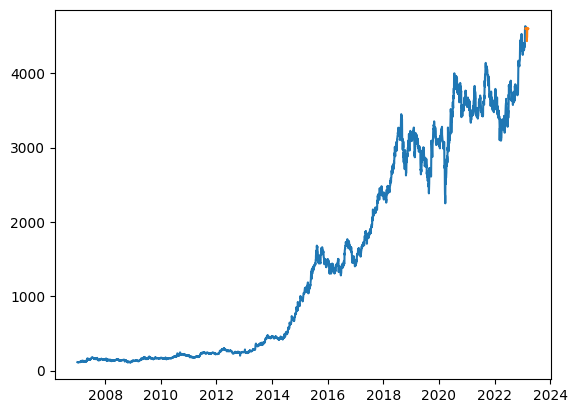

In [239]:
plt.plot(X.DATE, y)
plt.plot(marchdf.DATE, y_mar_pred)

In [242]:
start_date = "2023-02-09"
end_date = "2024-02-09"
date_range = pd.date_range(start=start_date, end=end_date, freq="D")
date_strings = date_range.strftime("%Y-%m-%d").tolist()

# Create the DataFrame
df = pd.DataFrame({"DATE": date_strings})

df.DATE = pd.to_datetime(df.DATE)

df["DAY"] = df.DATE.dt.day
df["MONTH"] = df.DATE.dt.month
df["YEAR"] = df.DATE.dt.year

In [244]:
y2024pred = model.predict(df[feat])

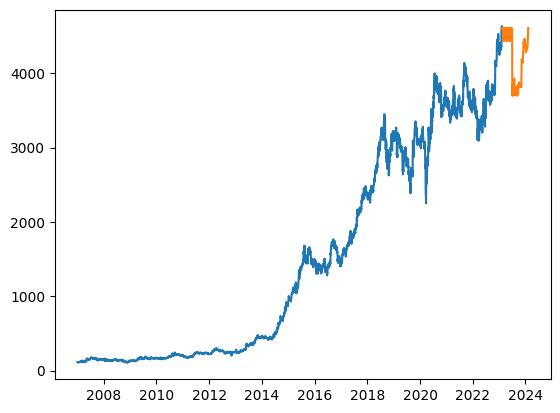

In [246]:
plt.plot(X.DATE, y)
plt.plot(df.DATE, y2024pred)